# **$k$ Nearest Neighbors**



Download the [NYC Building Energy Efficiency](https://www.kaggle.com/datasets/alistairking/nyc-building-energy-efficiency-ratings/data?select=geojson_lookup_rows.csv) dataset [here](https://drive.google.com/file/d/1eSTMHM_l74_AfEPl9xcZtHJxHOwSxP0l/view?usp=sharing) \
```k-NN``` documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier

In [3]:
merged_data = pd.read_csv('../Data/energy_ny_buildings_curated.csv')

# Split the data into features (X) and target (y)
X = merged_data[['DOF_Gross_Square_Footage_x', 'Energy_Star_1-100_Score_x']]
y = merged_data['Energy_Efficiency_Grade_x']

In [4]:
# --- 1) Codificar y ANTES del split (para evitar fugas y problemas) ---
le = LabelEncoder()
y = le.fit_transform(y)  # A,B,C,D -> 0,1,2,3


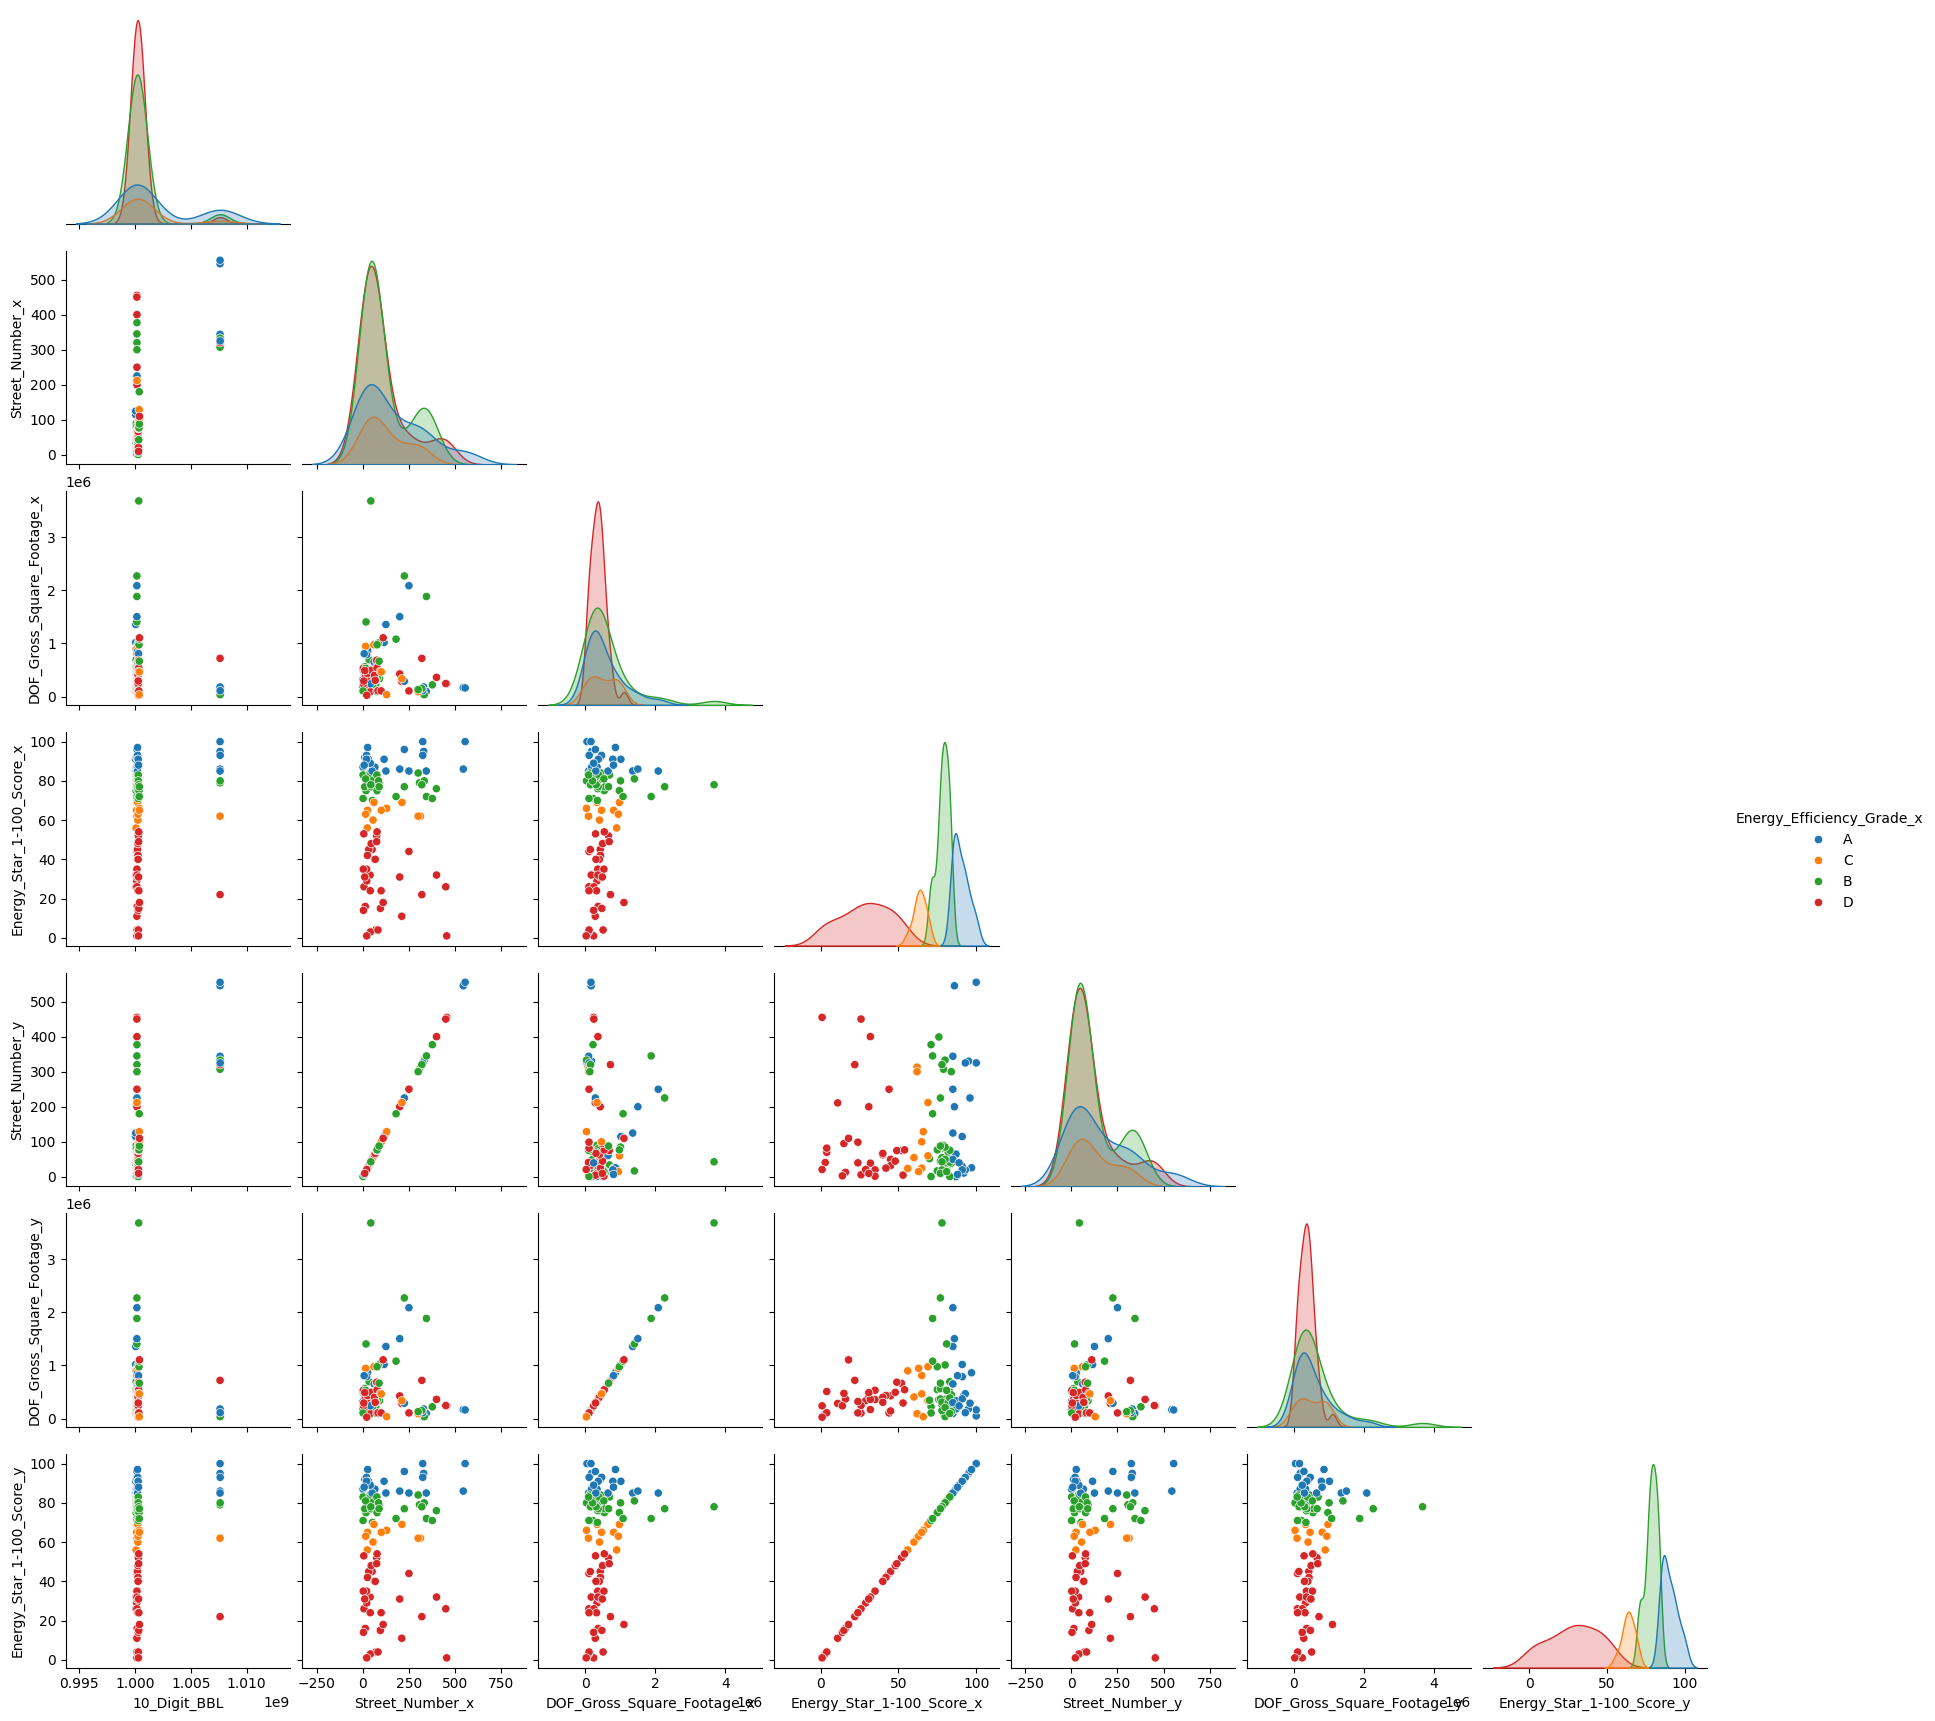

In [5]:
sns.pairplot(merged_data, hue='Energy_Efficiency_Grade_x', corner=True)

<Axes: xlabel='DOF_Gross_Square_Footage_x', ylabel='Energy_Star_1-100_Score_x'>

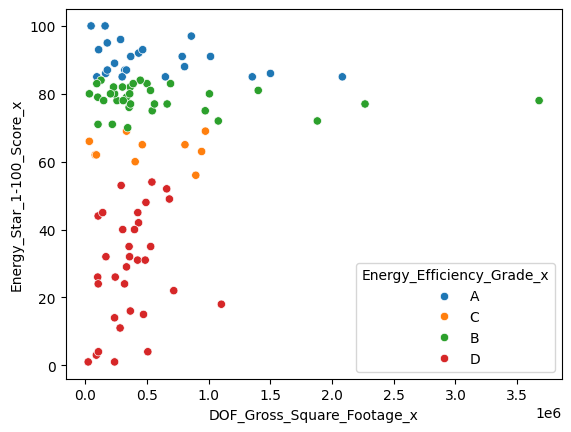

In [6]:
sns.scatterplot(data = merged_data, x = 'DOF_Gross_Square_Footage_x', y='Energy_Star_1-100_Score_x', hue = 'Energy_Efficiency_Grade_x')

In [7]:
# Modelo XGBoost
xgb = XGBClassifier(
    n_estimators=1000,          # grande + early stopping
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="auc",          # para early stopping
    tree_method="hist",         # usa "gpu_hist" si tienes GPU compatible
    random_state=42
)

# Training
xgb.fit(
    X, y,
    # eval_set=[(X_valid, y_valid)],
    verbose=False
)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [8]:
# Model Evaluation
y_pred = xgb.predict(X)

# Print Classification Report
print("Classification Report:")
print(classification_report(y, y_pred))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        33

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion Matrix:
[[23  0  0  0]
 [ 0 34  0  0]
 [ 0  0 10  0]
 [ 0  0  0 33]]


In [9]:
# Valores minimos y maximos para crear el grid de las fronteras de decision
h_min, h_max = X.iloc[:, 0].min(), X.iloc[:, 0].max()
v_min, v_max = X.iloc[:, 1].min(), X.iloc[:, 1].max()

# Crear el grid de las fronteras de decision
h_grid,v_grid = np.meshgrid(np.linspace(h_min, h_max, 100), np.linspace(v_min, v_max, 100))

# Predecir los valores del grid
pred_grid= xgb.predict(np.c_[h_grid.ravel(), v_grid.ravel()])
print (pred_grid.shape)
# Encajar las predicciones al tamaño del grid
pred_grid = pred_grid.reshape(h_grid.shape)
print (pred_grid.shape)

(10000,)
(100, 100)


<Axes: xlabel='DOF_Gross_Square_Footage_x', ylabel='Energy_Star_1-100_Score_x'>

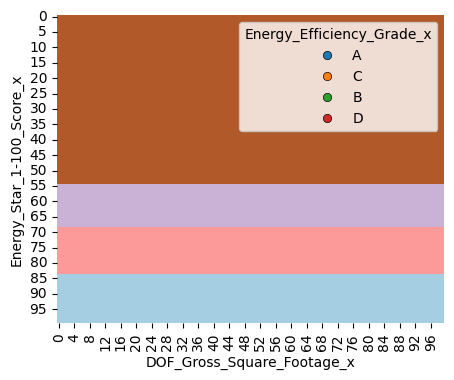

In [30]:
# Dibujar el grid y las fronteras de decision
_, ax = plt.subplots (figsize=(5,4))

# ax.pcolormesh(h_grid, v_grid, pred_grid, cmap = 'Paired')
sns.heatmap(pred_grid, cmap='Paired', cbar=False, ax=ax)

# Imprimir las muestras con el scatter
sns.scatterplot(data = merged_data, x = 'DOF_Gross_Square_Footage_x', y='Energy_Star_1-100_Score_x', hue = 'Energy_Efficiency_Grade_x', edgecolors='k', ax=ax)

# ax.set_xlim(h_grid.min(), h_grid.max())
# ax.set_ylim(v_grid.min(), v_grid.max())


In [28]:
pred_grid

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(100, 100))

## Using the Fruits dataset

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.datasets import load_iris # Iris dataset

In [ ]:
fruit_data = _ # Load the fruits dataset
fruits_x = _  # Features. We'll pick 2
fruits_y = _  # Labels

# Convert everything to a np array
fruits_x, fruits_y = np.asarray(fruits_x), np.asarray(fruits_y)

# Print shapes
print ( _ )

In [ ]:
# Instance kNN object
n_neighbors = _
knn = kNN(n_neighbors = _ )

# Training
 _ #(num_samples, Features)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
## Plot decision boundaries
_